# Over Dose Prevention

## Overview

## Business Probelm

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
od_data = pd.read_csv('Data/OD_Deaths.csv')
od_data.head()

,State,State Name,Year,Month,Indicator,Data Value,Predicted Value,Percent Complete,Percent Pending Investigation,Footnote
0,AK,AK,2015,January,Number of Deaths,4034.0,NaN,100,0.0,NaN
1,AK,AK,2015,February,Number of Deaths,4084.0,NaN,100,0.0,NaN
2,AK,AK,2015,March,Number of Deaths,4101.0,NaN,100,0.0,NaN
3,AK,AK,2015,April,Number of Deaths,4133.0,NaN,100,0.0,NaN
4,AK,AK,2015,May,Number of Deaths,4196.0,NaN,100,0.0,NaN


In [3]:
od_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10320 non-null  object 
 1   State Name                     10320 non-null  object 
 2   Year                           10320 non-null  int64  
 3   Month                          10320 non-null  object 
 4   Indicator                      10320 non-null  object 
 5   Data Value                     10320 non-null  float64
 6   Predicted Value                7440 non-null   float64
 7   Percent Complete               10320 non-null  int64  
 8   Percent Pending Investigation  10320 non-null  float64
 9   Footnote                       4128 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 806.4+ KB


In [4]:
od_data['Indicator'].value_counts()

Number of Deaths                                 2120
Number of Drug Overdose Deaths                   2120
Methadone (T40.3)                                 760
Cocaine (T40.5)                                   760
Natural & semi-synthetic opioids (T40.2)          760
Opioids (T40.0-T40.4,T40.6)                       760
Percent with drugs specified                      760
Synthetic opioids, excl. methadone (T40.4)        760
Heroin (T40.1)                                    760
Psychostimulants with abuse potential (T43.6)     760
Name: Indicator, dtype: int64

In [5]:
od_data[['Indicator', 'Predicted Value']].value_counts()

Indicator                       Predicted Value
Methadone (T40.3)               32.0               20
                                33.0               19
                                39.0               19
                                31.0               16
Cocaine (T40.5)                 54.0               16
                                                   ..
Number of Drug Overdose Deaths  2396.0              1
                                2394.0              1
                                2386.0              1
                                2379.0              1
                                1069.0              1
Length: 4045, dtype: int64

In [6]:
od_data['Predicted Value'].value_counts()

32.0       47
39.0       40
49.0       39
33.0       38
40.0       37
           ..
2714.0      1
2087.0      1
72816.0     1
998.0       1
2823.0      1
Name: Predicted Value, Length: 2084, dtype: int64

In [7]:
od_data['Percent Complete'].value_counts()

100    10320
Name: Percent Complete, dtype: int64

In [8]:
od_data['Percent Pending Investigation'].value_counts()

0.000000    1084
0.201884      20
0.028775      12
0.035851      10
0.178851      10
            ... 
0.448405       2
0.025623       2
0.042091       2
0.017596       2
0.048884       2
Name: Percent Pending Investigation, Length: 1883, dtype: int64

In [9]:
od_data['Year'].value_counts()

2015    3096
2017    3096
2016    3096
2018    1032
Name: Year, dtype: int64

- 3.33 years of data?

In [10]:
od_data['Footnote'].value_counts()

Underreported due to incomplete data                                                                                  4120
Jurisdiction-specific values not shown for 2018 due to incomplete cause of death reporting at the time of analysis       8
Name: Footnote, dtype: int64

In [11]:
od_data['State'].value_counts()

UT    400
NC    400
NM    400
NV    400
CT    400
WV    400
YC    400
NY    400
ME    400
US    400
OK    400
NH    400
VT    400
SC    400
OR    400
RI    400
WA    400
MD    400
VA    400
DC     80
SD     80
IN     80
MN     80
AR     80
PA     80
AZ     80
KS     80
NE     80
CA     80
ID     80
ND     80
IA     80
AK     80
MA     80
WY     80
OH     80
LA     80
CO     80
FL     80
KY     80
WI     80
IL     80
MO     80
MT     80
NJ     80
AL     80
HI     80
TN     80
TX     80
MI     80
GA     80
DE     80
MS     80
Name: State, dtype: int64

In [12]:
od_data['State Name'].value_counts()

UT    400
NC    400
NM    400
NV    400
CT    400
WV    400
YC    400
NY    400
ME    400
US    400
OK    400
NH    400
VT    400
SC    400
OR    400
RI    400
WA    400
MD    400
VA    400
DC     80
SD     80
IN     80
MN     80
AR     80
PA     80
AZ     80
KS     80
NE     80
CA     80
ID     80
ND     80
IA     80
AK     80
MA     80
WY     80
OH     80
LA     80
CO     80
FL     80
KY     80
WI     80
IL     80
MO     80
MT     80
NJ     80
AL     80
HI     80
TN     80
TX     80
MI     80
GA     80
DE     80
MS     80
Name: State Name, dtype: int64

In [13]:
od_data['State'].value_counts()==od_data['State Name'].value_counts()

UT    True
NC    True
NM    True
NV    True
CT    True
WV    True
YC    True
NY    True
ME    True
US    True
OK    True
NH    True
VT    True
SC    True
OR    True
RI    True
WA    True
MD    True
VA    True
DC    True
SD    True
IN    True
MN    True
AR    True
PA    True
AZ    True
KS    True
NE    True
CA    True
ID    True
ND    True
IA    True
AK    True
MA    True
WY    True
OH    True
LA    True
CO    True
FL    True
KY    True
WI    True
IL    True
MO    True
MT    True
NJ    True
AL    True
HI    True
TN    True
TX    True
MI    True
GA    True
DE    True
MS    True
dtype: bool

## Data Preparation

- The column 'Percent Complete'

- The column 'State Name'

- The column 'Predicted Value'

- The column 'Footnote'

In [14]:
od_data = od_data.drop(columns=['Percent Complete'], axis=1)

In [15]:
od_data = od_data.drop(columns=['State Name'], axis=1)

In [16]:
od_data = od_data.drop(columns=['Predicted Value'], axis=1)

In [17]:
od_data = od_data.drop(columns=['Footnote'], axis=1)

In [18]:
od_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          10320 non-null  object 
 1   Year                           10320 non-null  int64  
 2   Month                          10320 non-null  object 
 3   Indicator                      10320 non-null  object 
 4   Data Value                     10320 non-null  float64
 5   Percent Pending Investigation  10320 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 483.9+ KB


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
od_data.head()

,State,Year,Month,Indicator,Data Value,Percent Pending Investigation
0,AK,2015,January,Number of Deaths,4034.0,0.0
1,AK,2015,February,Number of Deaths,4084.0,0.0
2,AK,2015,March,Number of Deaths,4101.0,0.0
3,AK,2015,April,Number of Deaths,4133.0,0.0
4,AK,2015,May,Number of Deaths,4196.0,0.0


In [21]:
od_data2 = od_data.copy()

In [22]:
od_data2['Date'] = od_data2['Month'] + " " + od_data2['Year'].astype(str)
od_data2.head()

,State,Year,Month,Indicator,Data Value,Percent Pending Investigation,Date
0,AK,2015,January,Number of Deaths,4034.0,0.0,January 2015
1,AK,2015,February,Number of Deaths,4084.0,0.0,February 2015
2,AK,2015,March,Number of Deaths,4101.0,0.0,March 2015
3,AK,2015,April,Number of Deaths,4133.0,0.0,April 2015
4,AK,2015,May,Number of Deaths,4196.0,0.0,May 2015


In [23]:
od_data2['Date'] = pd.to_datetime(od_data2['Date'])
od_data2.head()

,State,Year,Month,Indicator,Data Value,Percent Pending Investigation,Date
0,AK,2015,January,Number of Deaths,4034.0,0.0,2015-01-01
1,AK,2015,February,Number of Deaths,4084.0,0.0,2015-02-01
2,AK,2015,March,Number of Deaths,4101.0,0.0,2015-03-01
3,AK,2015,April,Number of Deaths,4133.0,0.0,2015-04-01
4,AK,2015,May,Number of Deaths,4196.0,0.0,2015-05-01


In [24]:
od_data2 = od_data2.drop(columns=['Year', 'Month'], axis=1)

In [25]:
od_data2.set_index('Date', inplace=True)

In [26]:
od_data2.head()

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0
2015-03-01,AK,Number of Deaths,4101.0,0.0
2015-04-01,AK,Number of Deaths,4133.0,0.0
2015-05-01,AK,Number of Deaths,4196.0,0.0


### Creat two Dataframes that have 'Number of Deaths' and 'Number of Drug Overdose Deaths' separate. 

In [27]:
od_df = od_data2[(od_data2['Indicator'] == 'Number of Deaths') | (od_data2['Indicator'] == 'Number of Drug Overdose Deaths')]
od_df.info()                                                                 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4240 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          4240 non-null   object 
 1   Indicator                      4240 non-null   object 
 2   Data Value                     4240 non-null   float64
 3   Percent Pending Investigation  4240 non-null   float64
dtypes: float64(2), object(2)
memory usage: 165.6+ KB


In [28]:
# Groupby way of splitting data
#grouped = od_data2.groupby(['State', 'Indicator'])
#od_df = grouped.get_group(('NY', 'Number of Deaths'&'Number of Overdose Deaths'))

In [29]:
od_df.head()

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0
2015-03-01,AK,Number of Deaths,4101.0,0.0
2015-04-01,AK,Number of Deaths,4133.0,0.0
2015-05-01,AK,Number of Deaths,4196.0,0.0


In [30]:
deaths_df = od_df[od_df['Indicator'] == 'Number of Deaths']

In [31]:
deaths_df.head(2)

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0


In [32]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          2120 non-null   object 
 1   Indicator                      2120 non-null   object 
 2   Data Value                     2120 non-null   float64
 3   Percent Pending Investigation  2120 non-null   float64
dtypes: float64(2), object(2)
memory usage: 82.8+ KB


In [33]:
overdose_df = od_df[od_df['Indicator'] == 'Number of Drug Overdose Deaths']

In [34]:
overdose_df.head(2)

,State,Indicator,Data Value,Percent Pending Investigation
Date,,,,
2015-01-01,AK,Number of Drug Overdose Deaths,126.0,0.0
2015-02-01,AK,Number of Drug Overdose Deaths,127.0,0.0


## Combo dataframe of total deths and drug deaths

In [35]:
combo_df = pd.merge(deaths_df, overdose_df, on=['Date', 'State']) 

In [36]:
combo_df.head(2)

,State,Indicator_x,Data Value_x,Percent Pending Investigation_x,Indicator_y,Data Value_y,Percent Pending Investigation_y
Date,,,,,,,
2015-01-01,AK,Number of Deaths,4034.0,0.0,Number of Drug Overdose Deaths,126.0,0.0
2015-02-01,AK,Number of Deaths,4084.0,0.0,Number of Drug Overdose Deaths,127.0,0.0


In [37]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Indicator_x                      2120 non-null   object 
 2   Data Value_x                     2120 non-null   float64
 3   Percent Pending Investigation_x  2120 non-null   float64
 4   Indicator_y                      2120 non-null   object 
 5   Data Value_y                     2120 non-null   float64
 6   Percent Pending Investigation_y  2120 non-null   float64
dtypes: float64(4), object(3)
memory usage: 132.5+ KB


In [38]:
combo_df = combo_df.drop(columns='Percent Pending Investigation_y', axis=1)

In [39]:
combo_df['Data Value_x'] = combo_df['Data Value_x'].astype(int)

In [40]:
combo_df['Data Value_y'] = combo_df['Data Value_y'].astype(int)

In [41]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Indicator_x                      2120 non-null   object 
 2   Data Value_x                     2120 non-null   int64  
 3   Percent Pending Investigation_x  2120 non-null   float64
 4   Indicator_y                      2120 non-null   object 
 5   Data Value_y                     2120 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 115.9+ KB


In [42]:
# Create copy of this df incase i need the columns to be somewhat original before these next changes
combos_df = combo_df.copy()

In [43]:
combo_df = combo_df.rename(columns={'Data Value_x': "Total Deaths", 'Data Value_y': "Overdose Deaths"})

In [44]:
combo_df = combo_df.drop(columns=['Indicator_x','Indicator_y'], axis=1)

In [45]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Total Deaths                     2120 non-null   int64  
 2   Percent Pending Investigation_x  2120 non-null   float64
 3   Overdose Deaths                  2120 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 82.8+ KB


In [46]:
combo_df['OD Percentage of Total Deaths'] = ((combo_df["Overdose Deaths"] / combo_df["Total Deaths"]).replace(np.nan, 0) * 100).round(1)

In [47]:
combo_df.head()

,State,Total Deaths,Percent Pending Investigation_x,Overdose Deaths,OD Percentage of Total Deaths
Date,,,,,
2015-01-01,AK,4034,0.0,126,3.1
2015-02-01,AK,4084,0.0,127,3.1
2015-03-01,AK,4101,0.0,125,3.0
2015-04-01,AK,4133,0.0,126,3.0
2015-05-01,AK,4196,0.0,125,3.0


In [48]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Total Deaths                     2120 non-null   int64  
 2   Percent Pending Investigation_x  2120 non-null   float64
 3   Overdose Deaths                  2120 non-null   int64  
 4   OD Percentage of Total Deaths    2120 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 99.4+ KB


## Specific Drug OD dataframe

In [49]:
od_drugs = od_data2.copy()

In [50]:
od_drugs = od_data2[(od_data2['Indicator'] != 'Number of Deaths') & (od_data2['Indicator'] != 'Number of Drug Overdose Deaths')]
od_drugs.info()                                                                 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6080 entries, 2015-01-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          6080 non-null   object 
 1   Indicator                      6080 non-null   object 
 2   Data Value                     6080 non-null   float64
 3   Percent Pending Investigation  6080 non-null   float64
dtypes: float64(2), object(2)
memory usage: 237.5+ KB


In [51]:
od_drugs = od_drugs.rename(columns={'Data Value': "Total Deaths"})

In [52]:
od_drugs['Indicator'].value_counts()

Opioids (T40.0-T40.4,T40.6)                      760
Methadone (T40.3)                                760
Cocaine (T40.5)                                  760
Percent with drugs specified                     760
Synthetic opioids, excl. methadone (T40.4)       760
Heroin (T40.1)                                   760
Natural & semi-synthetic opioids (T40.2)         760
Psychostimulants with abuse potential (T43.6)    760
Name: Indicator, dtype: int64

In [53]:
od_drugs.head()

,State,Indicator,Total Deaths,Percent Pending Investigation
Date,,,,
2015-01-01,CT,Cocaine (T40.5),118.0,0.009927
2015-02-01,CT,Cocaine (T40.5),124.0,0.009885
2015-03-01,CT,Cocaine (T40.5),124.0,0.009837
2015-04-01,CT,Cocaine (T40.5),125.0,0.009858
2015-05-01,CT,Cocaine (T40.5),124.0,0.013142


## Visualizations

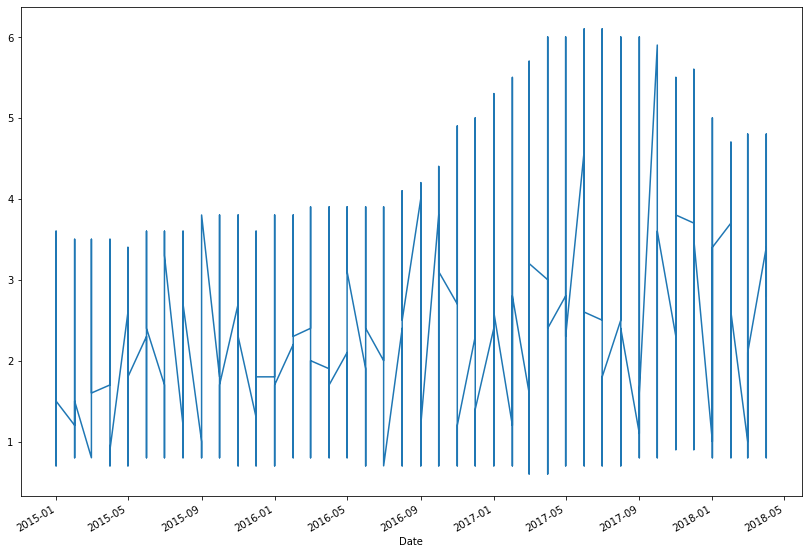

In [54]:
combo_df['OD Percentage of Total Deaths'].plot(figsize = (14,10))
plt.show();

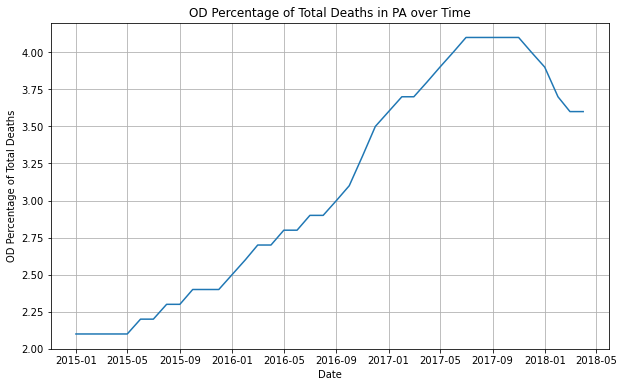

In [55]:
# Filter data for 'PA' state
pa_df = combo_df[combo_df['State'] == 'PA']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(pa_df.index, pa_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in PA over Time')
plt.grid(True)
plt.show()

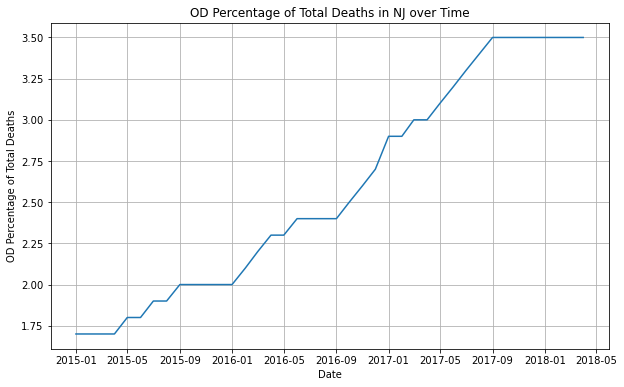

In [56]:
# Filter data for 'NJ' state
nj_df = combo_df[combo_df['State'] == 'NJ']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(nj_df.index, nj_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in NJ over Time')
plt.grid(True)
plt.show()

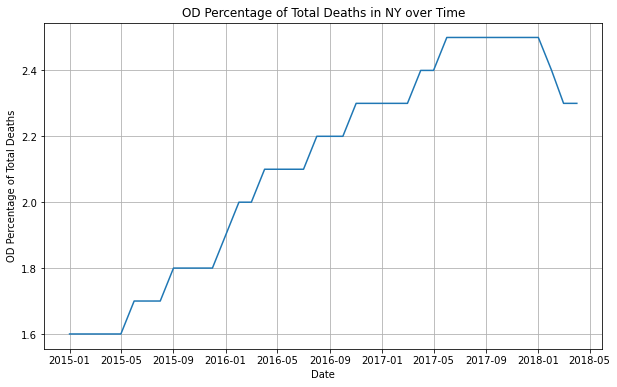

In [57]:
# Filter data for 'NY' state
ny_df = combo_df[combo_df['State'] == 'NY']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(ny_df.index, ny_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in NY over Time')
plt.grid(True)
plt.show()

## I have no idea what 'State' or territory is represented by 'US' and 'YC'

In [58]:
# Find top 5 values in 'OD Percentage of Total Deaths' column
top_5_values = combo_df.nlargest(5, 'OD Percentage of Total Deaths')

# Display the top 5 values
print(top_5_values)

           State  Total Deaths  Percent Pending Investigation_x  \
Date                                                              
2017-06-01    DC          6328                         0.000000   
2017-07-01    DC          6314                         0.000000   
2017-04-01    DC          6241                         0.000000   
2017-05-01    DC          6287                         0.000000   
2017-08-01    DC          6296                         0.015883   

            Overdose Deaths  OD Percentage of Total Deaths  
Date                                                        
2017-06-01              384                            6.1  
2017-07-01              383                            6.1  
2017-04-01              375                            6.0  
2017-05-01              380                            6.0  
2017-08-01              377                            6.0  


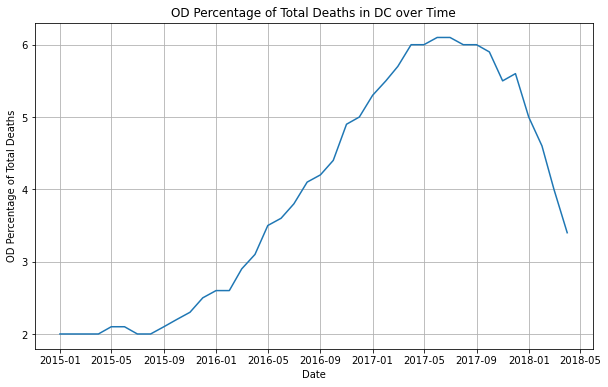

In [59]:
# Filter data for 'DC' state
dc_df = combo_df[combo_df['State'] == 'DC']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(dc_df.index, dc_df['OD Percentage of Total Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in DC over Time')
plt.grid(True)
plt.show()

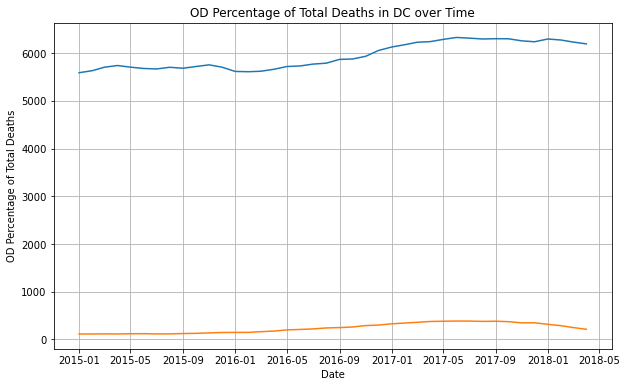

In [60]:
# Filter data for 'DC' state
dc_df = combo_df[combo_df['State'] == 'DC']

# Create a line plot for 'OD Percentage of Total Deaths'
plt.figure(figsize=(10, 6))
plt.plot(dc_df.index, dc_df['Total Deaths'], dc_df['Overdose Deaths'])
plt.xlabel('Date')
plt.ylabel('OD Percentage of Total Deaths')
plt.title('OD Percentage of Total Deaths in DC over Time')
plt.grid(True)
plt.show()

In [61]:
combo_df.corr()

,Total Deaths,Percent Pending Investigation_x,Overdose Deaths,OD Percentage of Total Deaths
Total Deaths,1.000000,0.051238,0.990751,-0.008546
Percent Pending Investigation_x,0.051238,1.000000,0.054464,0.147684
Overdose Deaths,0.990751,0.054464,1.000000,0.036555
OD Percentage of Total Deaths,-0.008546,0.147684,0.036555,1.000000


In [62]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2120 entries, 2015-01-01 to 2018-04-01
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            2120 non-null   object 
 1   Total Deaths                     2120 non-null   int64  
 2   Percent Pending Investigation_x  2120 non-null   float64
 3   Overdose Deaths                  2120 non-null   int64  
 4   OD Percentage of Total Deaths    2120 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 99.4+ KB


## Models

In [63]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson


In [64]:
combo_df.head(2)

,State,Total Deaths,Percent Pending Investigation_x,Overdose Deaths,OD Percentage of Total Deaths
Date,,,,,
2015-01-01,AK,4034,0.0,126,3.1
2015-02-01,AK,4084,0.0,127,3.1


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

yc_df = combo_df[combo_df['State'] == 'CT']

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(yc_df.drop(['State'], axis=1), ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(yc_df.drop(['State'], axis=1), ax=ax, lags=40);

In [71]:
ct_df.shape

(40, 5)

In [72]:
ct_df = combo_df[combo_df['State'] == 'CT']

train = ct_df.iloc[:30]
test = ct_df.iloc[30:]

model = ARIMA(train['Total Deaths'], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit)

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

In [73]:
#model_fit.predict()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Total Deaths   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -188.120
Date:                Mon, 10 Apr 2023   AIC                            382.239
Time:                        00:09:11   BIC                            386.443
Sample:                    01-01-2015   HQIC                           383.584
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.065e+04    370.829     82.650      0.000    2.99e+04    3.14e+04
ar.L1          0.9603      0.086     11.204      0.000       0.792       1.128
sigma2      1.504e+04   4190.895      3.588      0.000    6824.269    2.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.11   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.01   Prob(JB):                         0.93
Heteroskedasticity (H):               3.38   Skew:                             0.17
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
output = model_fit.forecast()

In [75]:
print(output)

2017-07-01    31226.118252
Freq: MS, dtype: float64


In [76]:
ct_df.iloc[30]

State                                     CT
Total Deaths                           31347
Percent Pending Investigation_x    0.0223307
Overdose Deaths                         1074
OD Percentage of Total Deaths            3.4
Name: 2017-07-01 00:00:00, dtype: object

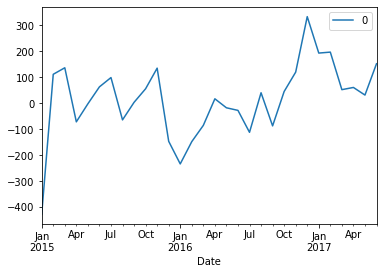

In [77]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

predicted=31301.373670, expected=31347.000000
predicted=31425.026638, expected=31376.000000
predicted=31338.974428, expected=31545.000000
predicted=31659.343703, expected=31513.000000
predicted=31537.723111, expected=31427.000000
predicted=31321.479581, expected=31545.000000
predicted=31636.531253, expected=31747.000000
predicted=31854.892613, expected=31570.000000
predicted=31450.972425, expected=31528.000000
predicted=31524.488529, expected=31552.000000
Test RMSE: 151.864


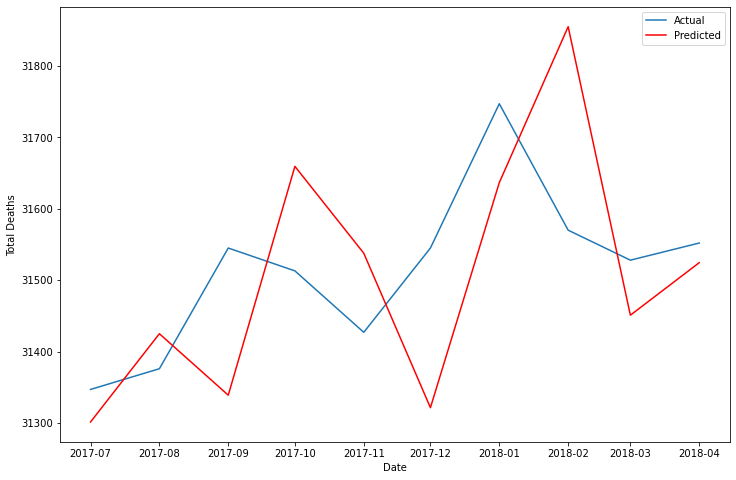

In [84]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 8)) 

predictions = []

# Create a history list to keep track of the training data
history = train['Total Deaths'].tolist()

# Walk-forward validation
for t in range(len(test)):
    # Fit the ARIMA model to the history data
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast the next value
    output = model_fit.forecast()
    yhat = output[0]
    
    # Append the predicted value to the list of predictions
    predictions.append(yhat)
    
    # Get the observed value from the test set
    obs = test['Total Deaths'].iloc[t]
    
    # Append the observed value to the history for the next iteration
    history.append(obs)
    
    # Print the predicted and expected values
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate the forecasts
rmse = sqrt(mean_squared_error(test['Total Deaths'], predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test.index, test['Total Deaths'])
plt.plot(test.index, predictions, color='red')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
## Compute autocorrelation and partial autocorrelation for 'Total Deaths' in combo_df
#value_combo_df = combo_df['Total Deaths'] # Extract 'Total Deaths' values for autocorrelation analysis
#acf_combo_df = sm.tsa.stattools.acf(value_combo_df, nlags=20)
#pacf_combo_df = sm.tsa.stattools.pacf(value_combo_df, nlags=20)


## Perform Ljung-Box test for autocorrelation on combo_df
#lb_test_stat_combo_df, lb_p_value_combo_df = acorr_ljungbox(value_combo_df, lags=20)
#print("Ljung-Box Test Statistic (combo_df):", lb_test_stat_combo_df)
#print("Ljung-Box Test p-value (combo_df):", lb_p_value_combo_df)

## Perform Durbin-Watson test for partial autocorrelation on combo_df
#dw_test_stat_combo_df, dw_p_value_combo_df = durbin_watson(value_combo_df)
#print("Durbin-Watson Test Statistic (combo_df):", dw_test_stat_combo_df)
#print("Durbin-Watson Test p-value (combo_df):", dw_p_value_combo_df)



In [ ]:
#combo_df = combo_df.sort_index(ascending=True)

In [ ]:
## Plot ACF and PACF for Total Deaths in combo_df
#plot_acf(combo_df['Total Deaths'])
#plt.title('Autocorrelation Function (ACF) for Total Deaths')
#plt.show()

#plot_pacf(combo_df['Total Deaths'])
#plt.title('Partial Autocorrelation Function (PACF) for Total Deaths')
#plt.show()

## Plot ACF and PACF for Deaths in od_drugs with Indicator 'Cocaine (T40.5)'
#plot_acf(od_drugs[od_drugs['Indicator'] == 'Cocaine (T40.5)']['Total Deaths'])
#plt.title('Autocorrelation Function (ACF) for Deaths with Indicator Cocaine (T40.5)')
#plt.show()

#plot_pacf(od_drugs[od_drugs['Indicator'] == 'Cocaine (T40.5)']['Total Deaths'])
#plt.title('Partial Autocorrelation Function (PACF) for Deaths with Indicator Cocaine (T40.5)')
#plt.show()

In [65]:
# Create and fit ARIMA model using the chosen parameters
model = ARIMA(combo_df['Total Deaths'], order=(1, 0, 0))
model_fit = model.fit()
print(model_fit)

/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/vincentamadio3/opt/anaconda3/envs/learn-env/lib/pytho

In [ ]:
model_fit.predict()

## Conclusion